# BagOfWords approach for classification

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import string
import time
import os
import mlflow

In [57]:
ENGLISH_STOP_WORDS = {'all', 'both', 'am', 'themselves', 'often', 'if', 'becoming', 'thence', 'while', 've', 'couldn', 'mostly', 'ma', 'more', 'de', 'thin', 'seems', 'do', 'sometime', 'across', 'nine', 'namely', 'hers', 'amoungst', 'needn', 'sixty', 'what', 'why', 'nevertheless', 'co', 'mustn', 'bottom', 'although', 'own', 'having', 'was', 'cant', 'from', 'll', 'etc', 'on', 'herself', 'had', 'beforehand', 'empty', 'they', 'less', 'seem', 'hasnt', 'he', 'serious', 'himself', 'whereafter', 'is', 'over', 'became', 'give', 'below', 'ain', 'yourselves', 'each', 'anyhow', 'one', 'moreover', 'where', 'might', 'already', 're', 'until', 'that', 'theirs', 'anywhere', 'other', 'through', 'should', 'at', 'fifteen', 'sometimes', 'bill', 'upon', 'describe', 'perhaps', 'after', 'there', 'not', 'whereas', 'around', 'this', 'eg', 'call', 'ours', 'can', 'who', 'besides', 'same', 'to', 'seemed', 'your', 'thick', 'whereupon', 'anyone', 'when', 'wasn', 'whoever', 'haven', 'be', 'either', 'rather', 'inc', 'has', 'ie', 'twenty', 'amongst', 'about', 'none', 'however', 'the', 'system', 'been', 'still', 'otherwise', 'two', 'whenever', 'their', 'because', 'but', 'y', 'for', 'former', 'which', 'due', 'i', 'does', 'onto', 'him', 'five', 'doesn', 'nowhere', 'of', 'those', 'behind', 'hereupon', 'latter', 'too', 'move', 'us', 'them', 'just', 'as', 'everything', 'any', 'everywhere', 'it', 'get', 'hadn', 'much', 'find', 'something', 'won', 'always', 'fire', 'couldnt', 'ourselves', 'yet', 'almost', 'now', 'twelve', 'mightn', 'o', 'under', 'some', 'no', 'eight', 'somewhere', 'together', 'anything', 'within', 'don', 'beside', 'most', 'mill', 'nothing', 'sincere', 'per', 'many', 'nor', 'thru', 'into', 'beyond', 'have', 'than', 'weren', 'therein', 'ten', 'its', 'take', 'towards', 'very', 'with', 'm', 'cry', 'also', 'were', 'since', 'ltd', 'whose', 'several', 'between', 'how', 'become', 'itself', 'here', 'formerly', 'in', 'back', 'becomes', 'thereupon', 'else', 'didn', 'third', 'without', 'name', 'whence', 'among', 'ever', 'first', 'keep', 'made', 'you', 'least', 'amount', 'an', 'except', 'whole', 'up', 'next', 'fify', 'someone', 'aren', 'interest', 'others', 'part', 'noone', 'throughout', 'found', 'thereafter', 'thus', 'must', 'yours', 'only', 'by', 'wherever', 'during', 'her', 'could', 'cannot', 'full', 'd', 'hundred', 'myself', 'herein', 'seeming', 'or', 'isn', 'elsewhere', 'side', 'well', 'then', 'done', 'hereby', 'may', 'off', 'go', 'being', 'once', 'put', 'indeed', 'enough', 'con', 'please', 'eleven', 'few', 'whereby', 'my', 'whether', 'detail', 'meanwhile', 'our', 'so', 'another', 'such', 'see', 'down', 'shan', 'neither', 'hence', 'will', 'never', 'mine', 'wouldn', 'somehow', 'whither', 'every', 'even', 'a', 'along', 'front', 'hereafter', 'are', 'forty', 'nobody', 'before', 'therefore', 'we', 'fill', 'four', 'three', 'alone', 'hasn', 't', 'afterwards', 'yourself', 'would', 'shouldn', 'six', 'against', 'anyway', 'wherein', 'doing', 'last', 'again', 'me', 'his', 'and', 'whom', 'whatever', 'thereby', 'she', 'above', 'further', 'these', 'top', 'via', 'though', 'out', 'un', 's', 'show', 'toward', 'everyone', 'latterly', 'did'}

In [58]:
#Function for basic cleaning/preprocessing texts
def clean(doc):
    # Removal of punctuation marks (.,/\][{} etc) and numbers
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # Removal of stopwords
    doc = " ".join([token for token in doc.split() if token not in ENGLISH_STOP_WORDS])
    # Removal of accents
    doc = doc.encode('ascii', 'ignore').decode('ascii')
    # Removal of whitespaces
    doc = " ".join(doc.split())
    # Lowercasing
    return doc.lower()

In [59]:
# MODELS for text classification
C = 2  # regularization parameter

models = {
    "Logistic Regression": LogisticRegression(penalty='l2', C=C),
    "Multinomial Naive Bayes": MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=0)
}


In [60]:
csvFile = "dataset"

In [61]:
df = pd.read_csv(csvFile, sep=';')

In [62]:
df

,class,text,image
0,0,Next? < Pre\ Here are slide . ES02 Session ¢ s...,focused_Algorithms_one_0.jpg
1,0,wax Next? < Prey Here are My ae) Ac Creativ ra...,focused_Algorithms_one_1.jpg
2,0,ee Next? < Prey an —. th Here are My ae) Ac ea...,focused_Algorithms_one_10.jpg
3,0,eK (h) P2* Pi2° ~yP: eps a Po (h) Graham’s Sca...,focused_Algorithms_one_100.jpg
4,0,ee Graham’s Scan: Start with bottom point Calc...,focused_Algorithms_one_101.jpg
...,...,...,...
14186,1,"comment Add 2,859 Comments = Sort by 17M views...",distracted_youtube_partial_5008.jpg
14187,1,6 key moments in this video YouTube - Red Bull...,distracted_youtube_partial_5009.jpg
14188,1,“a. Add a comment 666 Comments Sort by Today w...,distracted_youtube_partial_5010.jpg
14189,1,Learn more IZ I Sz il Universit) 13M views 1 y...,distracted_youtube_partial_5011.jpg


In [63]:
# count NaN values in each column
df.isnull().sum()

class      0
text     181
image      0
dtype: int64

In [64]:
# dataframe with the rows that have NaN values
df_0 = df[df['class'] == 0]
nan_df_0 = df_0[df_0.isna().any(axis=1)]
df_1 = df[df['class'] == 1]
nan_df_1 = df_1[df_1.isna().any(axis=1)]
print(len(nan_df_0))
print(len(nan_df_1))

6
175


In [65]:
# drop rows with NaN values
df = df.dropna()

In [66]:
vectorizer = TfidfVectorizer(preprocessor=clean)
# Create sample set of documents
docs = df.text.to_numpy()

In [67]:
# Fit the TFIDF (BoW + idf) model
idf_bag = vectorizer.fit_transform(docs)
idf_bag.shape

(14010, 111874)

In [68]:
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
print(len(vectorizer.get_feature_names_out()))

111874


In [69]:
# Print the numerical feature vector
print(idf_bag.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [70]:
# Creating training data
X = idf_bag.toarray()
y = df["class"].to_numpy()

In [71]:
# Create training and test split
train_split = 0.8
test_split = 0.2
if train_split + test_split > 1:
    raise ValueError("Train and test split must sum to 1")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split)

## Choose a model

In [72]:
model_name = "Logistic Regression" # "Random Forest" or "Multinomial Naive Bayes"
model = models[model_name]

In [73]:
mlflow.set_experiment(experiment_name="MLADHD_Experiments_Text")
mlflow.start_run()
mlflow.log_param("model", model_name)
mlflow.log_param("dataset", csvFile)
mlflow.log_param("data_size", len(df))
mlflow.log_param("data_split", str((train_split, test_split)))
mlflow.log_param("model_params", str([C, 'l2']))

"[2, 'l2']"

In [74]:
# Fit the model
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f"Training time: {end - start}")
mlflow.log_metric("training_time", end - start)

Training time: 113.79805517196655


In [75]:
# Create the predictions
y_predict = model.predict(X_test)

In [76]:
# Select a test_split of the nan_dfs
nan_df_0 = nan_df_0.sample(frac=test_split)
nan_df_1 = nan_df_1.sample(frac=test_split)
# Concatenate the nan_dfs
nan_df = pd.concat([nan_df_0, nan_df_1])
# Iterate over the nan_dfs and add wrong predictions to the dataframe
# If no text is provided, the prediction is 0 (focused as default)
for index, row in nan_df.iterrows():
    real_class = row["class"]
    y_test = np.append(y_test, real_class)
    y_predict = np.append(y_predict, 0)

In [77]:
len(nan_df_0)

1

In [78]:
len(nan_df_1)

35

Model accuracy:  0.966878083157153
Model precision:  0.9644723092998955
Model recall:  0.9389623601220752
Model f1-score:  0.9515463917525773


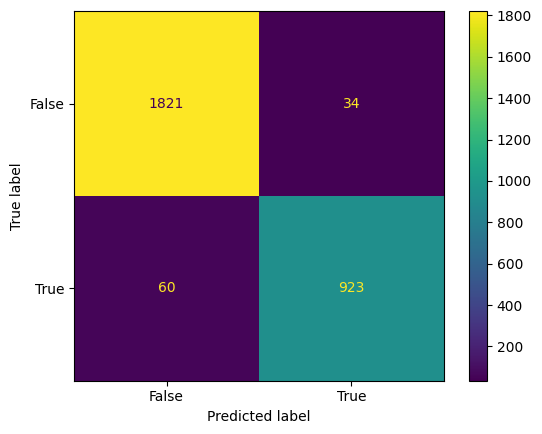

In [79]:
# Compute the accuracy, precision, recall and f1-score
print("Model accuracy: ", metrics.accuracy_score(y_test, y_predict))
print("Model precision: ", metrics.precision_score(y_test, y_predict))
print("Model recall: ", metrics.recall_score(y_test, y_predict))
print("Model f1-score: ", metrics.f1_score(y_test, y_predict))
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
mlflow.log_metric("accuracy", metrics.accuracy_score(y_test, y_predict))
mlflow.log_metric("precision", metrics.precision_score(y_test, y_predict))
mlflow.log_metric("recall", metrics.recall_score(y_test, y_predict))
mlflow.log_metric("f1-score", metrics.f1_score(y_test, y_predict))
# Visualize the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [80]:
# Save the model
run = mlflow.active_run()
#print("Active run_id: {}".format(run.info.run_id))
path = os.path.join(os.getcwd(), "..", "models", "text", run.info.run_id)
mlflow.sklearn.log_model(model, path)

## Interpretability

In [81]:
model.coef_

array([[ 0.72709629, -0.13138926, -0.00197357, ..., -0.01589681,
         0.02604595,  0.01414781]])

In [82]:
# Assigning the feature names to an empty list
feat_impts = [vectorizer.get_feature_names_out()]
#For all the models save the feature importances in the estimators list would give the internal models used by the #multioutput regressor
for clf in model.coef_:
    #For each model in the estimators list, save the feature importances in the feat_impts list
    feat_impts.append(clf)

In [83]:
#Saving the coefficients in a dataframe
df_feats_impts = pd.DataFrame(np.transpose(np.array(feat_impts)), columns = ["word", "distracted"])

In [84]:
#Creating Individual Feature Importance table by sorting on specific distracted-type column and selecting top 20 words
distracted_fi = df_feats_impts[["word","distracted"]].sort_values(by = "distracted", ascending = False).head(20)

In [85]:
distracted_fi

,word,distracted
62243,more,4.46529
38096,game,4.256554
49698,instagram,3.812916
99476,trending,3.777376
10223,best,3.76424
106633,washington,3.409322
100402,twitter,3.388142
74435,play,3.238547
100999,ues,3.205036
87862,shop,3.041774


In [86]:
#Creating Individual Feature Importance table by sorting on specific focused-type column and selecting top 20 words
focused_fi = df_feats_impts[["word","distracted"]].sort_values(by = "distracted").head(20)
# Rename the column
focused_fi = focused_fi.rename(columns={"distracted": "focused"})

In [87]:
focused_fi

,word,focused
35463,file,-3.918294
48514,inbox,-3.755862
22706,dashboard,-3.748407
55474,lecture,-3.569366
111690,zoom,-3.379583
78526,question,-3.276079
14227,canvas,-3.241027
107577,what,-3.176026
20745,course,-3.163934
43052,help,-3.136831


In [88]:
# inverse sort the distracted_fi dataframe
distracted_fi = distracted_fi[::-1]

In [89]:
# plot the feature importance (top 20 words) for each class in a bar chart (plotly)
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Focused', x=focused_fi["word"], y=focused_fi["focused"]),
    go.Bar(name='Distracted', x=distracted_fi["word"], y=distracted_fi["distracted"]),
])
# tilt the x-axis labels
fig.update_layout(xaxis_tickangle=-45)
# Font size
fig.update_layout(font=dict(size=15))
# legend font size
fig.update_layout(legend=dict(
    font=dict(
        size=15
    )
))
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()


In [90]:
# Log the first 20 distracted words
mlflow.log_param("distracted_words", distracted_fi.word.to_list())
# Log the first 20 focused words
mlflow.log_param("focused_words", focused_fi.word.to_list())

['file',
 'inbox',
 'dashboard',
 'lecture',
 'zoom',
 'question',
 'canvas',
 'what',
 'course',
 'help',
 'calendar',
 'vcu',
 'text',
 'drive',
 'tools',
 'edit',
 'insert',
 'courses',
 'files',
 'printing']

In [91]:
# Log the vectorizer
path = os.path.join(os.getcwd(), "..", "models", "text", run.info.run_id, "vectorizer")
mlflow.sklearn.log_model(vectorizer, path)

2023/06/15 21:08:15 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [92]:
mlflow.end_run()